<a href="https://colab.research.google.com/github/T81oub/geoai-hack-2022-crop-type-classification-challenge/blob/main/ProjetStage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GeoAI Hack 2022 Crop Type Classification Challenge

This is a private hackathon open to Tunisia GeoAI Hack 2022 participants. If you are a University Student or a Young Professional and would like to participate, please fill out this form.

With the growth of world population, much more effort and innovation will be urgently needed in order to sustainably increase agricultural production, improve the global supply chain, decrease food waste, and ensure access to nutritious food to all vulnerable people essentially in developing countries and Africa. Sustainable agriculture is related to The Sustainable Development Goal to “End hunger, achieve food security and improve nutrition and promote sustainable agriculture” (SDG2).

In this context, crop type mapping is a major challenge for agricultural and environmental policy makers. The recent growth of open Satellite imagery time series allows large scale crop mapping.

The objective of the challenge is to use Sentinel-2 multispectral time series to classify crops in Central Tunisia, specifically in the Kairouan agricultural region.

The ground truth reference data was collected in the field by the AGEOS Team. The challenge datasets were processed by IEEE Sup'com GRSS Chapter Members.

# 1.Loading libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import math

# 2. Loading data

In [64]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
submission = pd.read_csv('/content/SampleSubmission.csv')

In [65]:
train.head()

,ID,Target,timestep1_B02_mean,timestep1_B03_mean,timestep1_B04_mean,timestep1_B05_mean,timestep1_B06_mean,timestep1_B07_mean,timestep1_B08_mean,timestep1_B8A_mean,...,timestep24_B02_min,timestep24_B03_min,timestep24_B04_min,timestep24_B05_min,timestep24_B06_min,timestep24_B07_min,timestep24_B08_min,timestep24_B8A_min,timestep24_B11_min,timestep24_B12_min
0,6fba03cb,olive+cereals,456.918182,799.361364,825.761364,1420.606818,2478.922727,2882.245455,3084.704545,1989.954545,...,113.0,562.0,206.0,1193.0,1497.0,1588.0,1644.0,2060.0,1157.0,1630.0
1,7ea60a74,plowing_and_sowing,1087.130208,1653.770833,2194.458333,2447.984375,2588.328125,2725.609375,2777.385417,3698.088542,...,328.0,913.0,746.0,1468.0,1523.0,1603.0,1782.0,2308.0,1429.0,1741.0
2,64d18595,olive,917.369369,1383.882883,1742.765766,2012.234234,2388.657658,2592.783784,2644.738739,3111.837838,...,113.0,587.0,312.0,1161.0,2050.0,2182.0,2238.0,2016.0,1134.0,2372.0
3,119c8ec4,arable_soil,1013.775120,1551.863636,2073.009569,2371.222488,2666.064593,2843.196172,2930.330144,3802.370813,...,212.0,592.0,810.0,1289.0,1655.0,1796.0,1824.0,2418.0,1708.0,1965.0
4,d884d98c,olive,801.352113,1243.741784,1557.410798,1827.133803,2248.718310,2433.793427,2471.901408,2846.659624,...,84.0,326.0,480.0,790.0,1132.0,1207.0,1194.0,1595.0,1085.0,1283.0


In [66]:
test.head()

,ID,timestep1_B02_mean,timestep1_B03_mean,timestep1_B04_mean,timestep1_B05_mean,timestep1_B06_mean,timestep1_B07_mean,timestep1_B08_mean,timestep1_B8A_mean,timestep1_B11_mean,...,timestep24_B02_min,timestep24_B03_min,timestep24_B04_min,timestep24_B05_min,timestep24_B06_min,timestep24_B07_min,timestep24_B08_min,timestep24_B8A_min,timestep24_B11_min,timestep24_B12_min
0,d8da32b5,901.974359,1255.743590,1561.230769,1891.230769,2340.333333,2568.282051,2679.179487,3381.820513,2856.641026,...,345.0,631.0,763.0,1299.0,1803.0,1964.0,2050.0,2384.0,1901.0,2171.0
1,670ad0fb,927.181818,1423.636364,1778.636364,2161.477273,2745.909091,2969.204545,3063.000000,3632.977273,2942.500000,...,600.0,1048.0,1416.0,2014.0,2367.0,2574.0,2614.0,3160.0,2482.0,2795.0
2,fec40ac9,716.611940,1126.828358,1390.171642,1751.037313,2480.328358,2757.880597,2798.059701,2913.335821,2234.589552,...,228.0,525.0,723.0,1106.0,1514.0,1582.0,1742.0,2141.0,1453.0,1761.0
3,4f6d4495,565.611940,931.238806,999.813433,1558.462687,2627.276119,2965.738806,3134.194030,2584.865672,1740.194030,...,245.0,528.0,723.0,1140.0,1270.0,1420.0,1532.0,2270.0,1387.0,1613.0
4,e56d2db7,943.473430,1371.809179,1709.190821,1926.652174,2180.309179,2325.961353,2378.082126,2846.335749,2323.219807,...,415.0,840.0,1046.0,1417.0,1885.0,2017.0,2080.0,2375.0,1665.0,2157.0


In [67]:
test = test.drop(columns=['ID'])
train = train.drop(columns=['ID'])

# 3.Data Visualization

In [68]:
train.describe()

,timestep1_B02_mean,timestep1_B03_mean,timestep1_B04_mean,timestep1_B05_mean,timestep1_B06_mean,timestep1_B07_mean,timestep1_B08_mean,timestep1_B8A_mean,timestep1_B11_mean,timestep1_B12_mean,...,timestep24_B02_min,timestep24_B03_min,timestep24_B04_min,timestep24_B05_min,timestep24_B06_min,timestep24_B07_min,timestep24_B08_min,timestep24_B8A_min,timestep24_B11_min,timestep24_B12_min
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,826.039380,1264.823679,1534.559069,1938.815380,2600.636295,2876.932359,2985.834547,3108.420655,2429.938561,3037.425322,...,246.202191,595.307769,680.809761,1175.660359,1731.605578,1918.469124,1900.181275,2080.300797,1400.980080,2073.429283
std,230.938070,301.210832,449.509855,391.125007,319.494496,365.617453,381.314622,656.239914,711.705271,373.184252,...,150.807854,226.128357,317.532936,322.044282,365.242186,397.252290,420.311209,468.923122,411.853348,428.892306
min,302.281967,516.475410,451.638681,874.668852,1701.291000,1917.047000,2103.804000,1526.881967,841.216393,2188.208861,...,1.000000,1.000000,1.000000,162.000000,598.000000,717.000000,487.000000,738.000000,403.000000,866.000000
25%,661.045366,1065.455652,1203.959027,1675.447539,2377.109819,2611.862069,2712.871902,2679.632851,1932.788922,2773.953600,...,133.000000,439.000000,425.000000,966.000000,1478.000000,1657.750000,1619.000000,1752.750000,1101.000000,1792.000000
50%,836.687820,1270.350129,1567.916329,1931.730284,2580.648079,2843.169515,2957.031598,3090.900817,2424.754991,3008.658642,...,241.000000,595.000000,669.000000,1168.500000,1708.000000,1913.500000,1903.000000,2051.000000,1366.000000,2075.000000
75%,976.447704,1456.784870,1845.849055,2183.467727,2793.607472,3110.279579,3226.978689,3589.716780,2936.175417,3266.150835,...,352.000000,752.000000,917.250000,1382.250000,1981.750000,2191.250000,2190.500000,2393.250000,1643.250000,2379.250000
max,1787.730496,2503.418440,3209.107438,3587.349862,3981.695312,4617.163636,4773.290909,5364.127640,5032.491276,4727.245455,...,933.000000,1676.000000,1964.000000,2645.000000,3033.000000,3296.000000,3186.000000,3700.000000,2988.000000,3425.000000


In [69]:
test.describe()

,timestep1_B02_mean,timestep1_B03_mean,timestep1_B04_mean,timestep1_B05_mean,timestep1_B06_mean,timestep1_B07_mean,timestep1_B08_mean,timestep1_B8A_mean,timestep1_B11_mean,timestep1_B12_mean,...,timestep24_B02_min,timestep24_B03_min,timestep24_B04_min,timestep24_B05_min,timestep24_B06_min,timestep24_B07_min,timestep24_B08_min,timestep24_B8A_min,timestep24_B11_min,timestep24_B12_min
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,826.816968,1262.825037,1534.420263,1934.350544,2592.602687,2866.877341,2975.360656,3113.434182,2437.187773,3027.142055,...,245.235060,593.274900,680.229084,1178.585657,1743.109562,1929.187251,1906.217131,2093.352590,1410.709163,2088.013944
std,230.247722,301.914763,446.207713,390.568068,314.362596,354.824184,365.117752,662.522509,714.774647,356.867678,...,150.693939,220.812138,303.234041,310.213763,365.613413,393.200427,411.615258,457.145431,400.007963,427.297652
min,292.785124,564.413223,439.644628,968.264463,1719.631240,1925.342190,2090.619968,1617.209195,940.147126,2188.849035,...,1.000000,76.000000,47.000000,300.000000,843.000000,933.000000,812.000000,879.000000,457.000000,1006.000000
25%,672.546029,1055.655360,1227.145869,1671.518614,2395.640047,2645.137169,2730.045894,2685.834240,1956.023949,2779.924884,...,133.000000,454.250000,455.000000,976.500000,1484.250000,1658.500000,1629.000000,1788.500000,1135.250000,1804.000000
50%,844.573574,1284.035043,1569.706567,1946.643793,2579.152226,2852.226417,2956.772938,3173.269286,2472.294728,3004.467697,...,232.000000,581.500000,669.500000,1167.500000,1719.000000,1939.500000,1902.000000,2092.500000,1392.000000,2102.500000
75%,987.250037,1477.915802,1862.091216,2205.733760,2779.594579,3069.644927,3184.640778,3574.506733,2900.674913,3236.864302,...,348.000000,742.500000,873.750000,1384.750000,1982.750000,2188.750000,2181.500000,2355.250000,1630.250000,2360.500000
max,1524.462312,2228.281407,2801.618090,3176.469849,3579.742739,4443.040816,4611.448980,4882.692797,4565.879237,4608.857143,...,1018.000000,1722.000000,1866.000000,2289.000000,2735.000000,2871.000000,3112.000000,3516.000000,2755.000000,3176.000000


In [70]:
print(f"Test shape : {test.shape}")
print(f"Train shape: {train.shape}")

Test shape : (502, 1200)
Train shape: (1004, 1201)


In [71]:
train['Target'].unique()

array(['olive+cereals', 'plowing_and_sowing', 'olive', 'arable_soil',
       'olive+arbo', 'ochards', 'olive+crops', 'wheat', 'greenhouses',
       'vegetable_and_flower', 'forage_crop', 'cereals', 'mixed_crops'],
      dtype=object)

In [72]:
train.columns

Index(['Target', 'timestep1_B02_mean', 'timestep1_B03_mean',
       'timestep1_B04_mean', 'timestep1_B05_mean', 'timestep1_B06_mean',
       'timestep1_B07_mean', 'timestep1_B08_mean', 'timestep1_B8A_mean',
       'timestep1_B11_mean',
       ...
       'timestep24_B02_min', 'timestep24_B03_min', 'timestep24_B04_min',
       'timestep24_B05_min', 'timestep24_B06_min', 'timestep24_B07_min',
       'timestep24_B08_min', 'timestep24_B8A_min', 'timestep24_B11_min',
       'timestep24_B12_min'],
      dtype='object', length=1201)

In [73]:
train.columns.shape

(1201,)

In [74]:
train.dtypes

Target                 object
timestep1_B02_mean    float64
timestep1_B03_mean    float64
timestep1_B04_mean    float64
timestep1_B05_mean    float64
                       ...   
timestep24_B07_min    float64
timestep24_B08_min    float64
timestep24_B8A_min    float64
timestep24_B11_min    float64
timestep24_B12_min    float64
Length: 1201, dtype: object

In [75]:
train['Target'].value_counts()

olive                   274
wheat                   120
arable_soil             117
ochards                 110
olive+cereals            72
olive+arbo               65
cereals                  51
forage_crop              49
plowing_and_sowing       47
olive+crops              38
vegetable_and_flower     27
mixed_crops              24
greenhouses              10
Name: Target, dtype: int64

<ipython-input-76-b0990223d56a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-76-b0990223d56a>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='timestep1_B03_mean', ylabel='Density'>

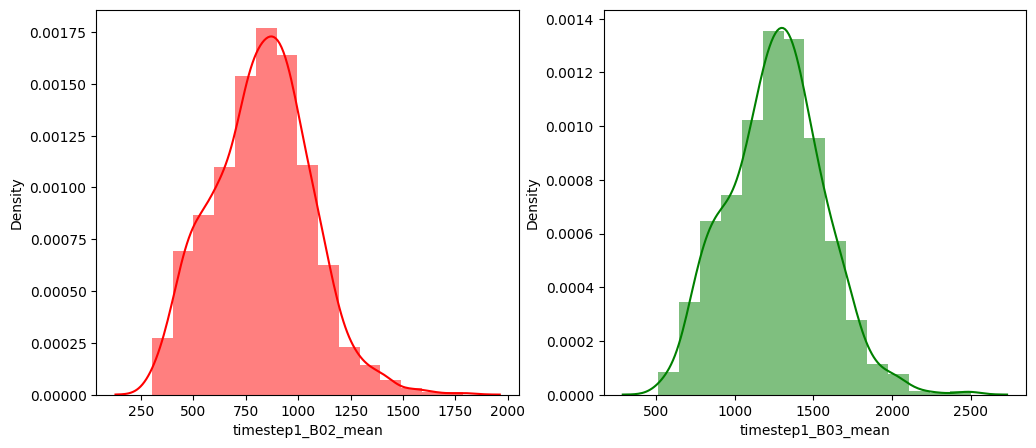

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

sns.distplot(train['timestep1_B02_mean'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(train['timestep1_B03_mean'],color="green",bins=15,hist_kws={'alpha':0.5})

In [77]:
train_summary = pd.pivot_table(train,index=['Target'],aggfunc='mean')
train_summary.head()

,timestep10_B02_max,timestep10_B02_mean,timestep10_B02_median,timestep10_B02_min,timestep10_B02_std,timestep10_B03_max,timestep10_B03_mean,timestep10_B03_median,timestep10_B03_min,timestep10_B03_std,...,timestep9_B12_max,timestep9_B12_mean,timestep9_B12_median,timestep9_B12_min,timestep9_B12_std,timestep9_B8A_max,timestep9_B8A_mean,timestep9_B8A_median,timestep9_B8A_min,timestep9_B8A_std
Target,,,,,,,,,,,,,,,,,,,,,
arable_soil,1166.863248,608.989108,590.188034,301.700855,160.294034,1780.299145,1064.905647,1041.683761,627.128205,216.110408,...,3440.162393,2852.096055,2841.405983,2287.444444,258.229467,3606.564103,2974.434861,2976.017094,2336.316239,281.259226
cereals,939.176471,514.215747,503.549020,276.235294,118.851859,1484.745098,988.538309,975.205882,668.176471,150.747993,...,3572.490196,2843.159467,2822.823529,2253.823529,296.263659,3378.803922,2792.110243,2776.088235,2273.333333,251.961790
forage_crop,955.612245,447.171642,418.265306,209.142857,156.386459,1497.755102,901.010670,871.193878,595.204082,182.896226,...,3813.122449,3125.814287,3129.897959,2382.775510,347.522106,3205.265306,2619.062322,2606.928571,2186.469388,230.210620
greenhouses,852.200000,517.150984,502.650000,284.700000,104.920419,1387.400000,985.824959,974.200000,660.200000,135.322368,...,3000.000000,2515.900632,2481.200000,2083.700000,202.089152,3199.600000,2691.560821,2661.100000,2232.400000,226.943015
mixed_crops,894.000000,520.042402,501.666667,289.958333,122.729495,1417.791667,934.902491,914.166667,620.000000,163.951661,...,3175.708333,2615.966667,2592.895833,2187.583333,224.169254,3272.208333,2769.441832,2763.083333,2319.791667,222.880924


In [78]:
timestep10_name=['02','03','04','05','06','07','08','8A','11','12']
for num in timestep10_name:
  fig = go.Figure()
  fig.add_trace(go.Bar(
    x=train_summary.index,
    y=train_summary['timestep10_B'+num+'_max'],
    name='timestep10_B'+num+'_max',
    marker_color='mediumvioletred'
))

  fig.add_trace(go.Bar(
    x=train_summary.index,
    y=train_summary['timestep10_B'+num+'_mean'],
    name='timestep10_B'+num+'_mean',
    marker_color='springgreen'
))
  fig.add_trace(go.Bar(
    x=train_summary.index,
    y=train_summary['timestep10_B'+num+'_median'],
    name='timestep10_B'+num+'_median',
    marker_color='dodgerblue'
))
  fig.add_trace(go.Bar(
    x=train_summary.index,
    y=train_summary['timestep10_B'+num+'_min'],
    name='timestep10_B'+num+'_min',
    marker_color='red'
))
  fig.add_trace(go.Bar(
    x=train_summary.index,
    y=train_summary['timestep10_B'+num+'_std'],
    name='timestep10_B'+num+'_std',
    marker_color='yellow'
))

  fig.update_layout(title='timestep10_B'+num,
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)
  fig.show()


# 4. Data Processing

In [79]:
train.isnull().sum().any()

False

In [80]:
test.isnull().sum().any()

False

In [81]:
train.duplicated().sum().any()

False

In [82]:
test.duplicated().sum().any()

False

In [83]:
in_cols = train.filter(like='timestep1_').columns.tolist()
col_names = [x[9:] for x in in_cols]

In [84]:
n = train.shape[0]
target_mapper = dict(zip(submission.columns.tolist(),[i for i in range(len(submission.columns.tolist()))]))
Inversetarget_mapper = dict(zip([i for i in range(len(submission.columns.tolist()))],submission.columns.tolist()))
train['Target'] = train['Target'].map(target_mapper)

In [85]:
def changedata(data):

  for i in range(1,25):
    data['timestep'+str(i)+'_vegitation_index_mean']= (data['timestep'+str(i)+'_B08_mean'] - data['timestep'+str(i)+'_B04_mean'] ) / (data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B04_mean'] )
    data['timestep'+str(i)+'_Moisture_index_mean']= (data['timestep'+str(i)+'_B8A_mean'] - data['timestep'+str(i)+'_B11_mean'] ) / (data['timestep'+str(i)+'_B8A_mean'] + data['timestep'+str(i)+'_B11_mean'] )

    #BAI: Burn Area Index uses the reflectance values in the red and NIR portion of the spectrum to identify the areas of the terrain affected by fire.
    data['timestep'+str(i)+'_BAI_mean']=1/((0.1 - data['timestep'+str(i)+'_B04_mean'])**2 +(0.06 -data['timestep'+str(i)+'_B08_mean']**2))
    #The Chlorophyll Index - Green (CIg) method is a vegetation index for estimating the chlorophyll content in leaves using the ratio of reflectivity in the NIR and green bands.
    data['timestep'+str(i)+'_Clg_mean']=(data['timestep'+str(i)+'_B08_mean']/data['timestep'+str(i)+'_B03_mean'])-1
    #The Chlorophyll Index - Red-Edge (CIre) method is a vegetation index for estimating the chlorophyll content in leaves using the ratio of reflectivity in the NIR and red-edge bands.
    data['timestep'+str(i)+'_CIre_mean']=(data['timestep'+str(i)+'_B08_mean']/data['timestep'+str(i)+'_B05_mean'])-1
    #The Clay Minerals (CM) ratio method is a geological index for identifying mineral features containing clay and alunite using two shortwave infrared (SWIR) bands. CM is used in mineral composite mapping.
    data['timestep'+str(i)+'_CM_mean']=(data['timestep'+str(i)+'_B11_mean']/data['timestep'+str(i)+'_B12_mean'])
    #The Enhanced Vegetation Index (EVI) method is an optimized vegetation index that accounts for atmospheric influences and vegetation background signal. It's similar to NDVI but is less sensitive to background and atmospheric noise, and it does not become as saturated as NDVI when viewing areas with very dense green vegetation.
    data['timestep'+str(i)+'_EVI_mean']=2.5*(data['timestep'+str(i)+'_B08_mean']-data['timestep'+str(i)+'_B04_mean'])/(data['timestep'+str(i)+'_B08_mean']+ 6 * data['timestep'+str(i)+'_B04_mean'] - 7.5 * data['timestep'+str(i)+'_B02_mean'] + 1)
    #The Green Normalized Difference Vegetation Index (GNDVI) method is a vegetation index for estimating photo synthetic activity and is a commonly used vegetation index to determine water and nitrogen uptake into the plant canopy.
    data['timestep'+str(i)+'_GNDVI_mean']=(data['timestep'+str(i)+'_B08_mean']-data['timestep'+str(i)+'_B03_mean'])/(data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B03_mean'])
    #The Iron Oxide (IO) ratio method is a geological index for identifying rock features that have experienced oxidation of iron-bearing sulfides using the red and blue bands. IO is useful in identifying iron oxide features below vegetation canopies and is used in mineral composite mapping.
    data['timestep'+str(i)+'_IO_mean']= data['timestep'+str(i)+'_B04_mean'] / data['timestep'+str(i)+'_B02_mean']
    #The Modified Soil Adjusted Vegetation Index (MSAVI2) method minimizes the effect of bare soil on the SAVI.
    data['timestep'+str(i)+'_MSAVI_mean']= 0.5 * (2* (data['timestep'+str(i)+'_B08_mean']+1)- ((2*data['timestep'+str(i)+'_B08_mean'] + 1)**2 - 8 * (data['timestep'+str(i)+'_B08_mean'] - data['timestep'+str(i)+'_B04_mean']))**(0.5))
    #The Modified Triangular Vegetation Index (MTVI2) method is a vegetation index for detecting leaf chlorophyll content at the canopy scale while being relatively insensitive to leaf area index. It uses reflectance in the green, red, and NIR bands.
    data['timestep'+str(i)+'_MTVI2_mean']=1.5*(1.2 * (data['timestep'+str(i)+'_B08_mean'] - data['timestep'+str(i)+'_B03_mean']) - 2.5 * (data['timestep'+str(i)+'_B04_mean'] - data['timestep'+str(i)+'_B03_mean']))* ((2 * data['timestep'+str(i)+'_B08_mean'] + 1)**2-(6 * data['timestep'+str(i)+'_B08_mean'] - 5 * data['timestep'+str(i)+'_B04_mean'] ** (1/2.0)) - 0.5)
    #The Normalized Burn Ratio Index (NBRI) uses the NIR and SWIR bands to emphasize burned areas, while mitigating illumination and atmospheric effects. Your images should be corrected to reflectance values before using this index
    data['timestep'+str(i)+'_NBR_mean']=(data['timestep'+str(i)+'_B08_mean'] - data['timestep'+str(i)+'_B11_mean'])/(data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B11_mean'])
    #The Normalized Difference Built-up Index (NDBI) uses the NIR and SWIR bands to emphasize manufactured built-up areas. It is ratio based to mitigate the effects of terrain illumination differences as well as atmospheric effects.
    data['timestep'+str(i)+'_NDBI_mean'] = (data['timestep'+str(i)+'_B11_mean'] - data['timestep'+str(i)+'_B08_mean']) / (data['timestep'+str(i)+'_B11_mean'] + data['timestep'+str(i)+'_B08_mean'])
    #The Normalized Difference Moisture Index (NDMI) is sensitive to the moisture levels in vegetation. It is used to monitor droughts and fuel levels in fire-prone areas.
    data['timestep'+str(i)+'_NDMI_mean']=(data['timestep'+str(i)+'_B08_mean'] - data['timestep'+str(i)+'_B11_mean'])/(data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B11_mean'])
    #The Normalized Difference Snow Index (NDSI) is designed to use MODIS (band 4 and band 6) and Landsat TM (band 2 and band 5) for identification of snow cover while ignoring cloud cover.
    data['timestep'+str(i)+'_NDSI_mean'] = (data['timestep'+str(i)+'_B03_mean'] - data['timestep'+str(i)+'_B11_mean'])/(data['timestep'+str(i)+'_B03_mean'] + data['timestep'+str(i)+'_B11_mean'])
    #The Normalized Difference Vegetation Index (NDVI) is a standardized index allowing you to generate an image displaying greenness (relative biomass).
    data['timestep'+str(i)+'_NDVI_mean'] = (data['timestep'+str(i)+'_B08_mean'] - data['timestep'+str(i)+'_B04_mean']) / (data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B04_mean'])
    #The Red-Edge NDVI (NDVIre) method is a vegetation index for estimating vegetation health using the red-edge band. It is especially useful for estimating crop health in the mid to late stages of growth, when the chlorophyll concentration is relatively higher. Also, NDVIre can be used to map the within-field variability of nitrogen foliage to understand the fertilizer requirements of crops.
    data['timestep'+str(i)+'_NDVIre_mean'] = (data['timestep'+str(i)+'_B08_mean'] - data['timestep'+str(i)+'_B05_mean']) / (data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B05_mean'])
    #The Normalized Difference Water Index (NDWI) method is an index for delineating and monitoring content changes in surface water. It is computed with the NIR and green bands.
    data['timestep'+str(i)+'_NDWI_mean'] = (data['timestep'+str(i)+'_B03_mean'] - data['timestep'+str(i)+'_B08_mean']) / (data['timestep'+str(i)+'_B03_mean'] + data['timestep'+str(i)+'_B08_mean'])
    #The Perpendicular Vegetation Index (PVI) method is similar to a difference vegetation index; however, it is sensitive to atmospheric variations. When using this method to compare images, it should only be used on images that have been atmospherically corrected.
    data['timestep'+str(i)+'_PVI_mean'] = (data['timestep'+str(i)+'_B08_mean'] - 0.3 * data['timestep'+str(i)+'_B04_mean'] - 0.5) / ((1 + 0.3 * 2) ** (1/2.0))
    #The Red-Edge Triangulated Vegetation Index (RTVICore) method is a vegetation index for estimating leaf area index and biomass. This index uses reflectance in the NIR, red-edge, and green spectral bands.
    data['timestep'+str(i)+'_RTVI_mean'] = (100 * (data['timestep'+str(i)+'_B08_mean']-data['timestep'+str(i)+'_B05_mean']) - 10 *(data['timestep'+str(i)+'_B08_mean']-data['timestep'+str(i)+'_B03_mean']))
    #The Soil-Adjusted Vegetation Index (SAVI) method is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor.
    data['timestep'+str(i)+'_SAVI_mean'] = ((data['timestep'+str(i)+'_B08_mean']-data['timestep'+str(i)+'_B04_mean'])/(data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B04_mean'] + 0.33)) * (1+0.33)
    #The Simple Ratio (SR) method is a common vegetation index for estimating the amount of vegetation. It is the ratio of light scattered in the NIR and absorbed in red bands, which reduces the effects of atmosphere and topography.
    data['timestep'+str(i)+'_SAVI_mean'] = data['timestep'+str(i)+'_B08_mean']/data['timestep'+str(i)+'_B04_mean']
    #The Red-Edge Simple Ratio (SRre) method is a vegetation index for estimating the amount of healthy and stressed vegetation.
    data['timestep'+str(i)+'_SRre_mean'] = data['timestep'+str(i)+'_B08_mean']/data['timestep'+str(i)+'_B05_mean']
    #The Transformed Soil Adjusted Vegetation Index (TSAVI) method is a vegetation index that minimizes soil brightness influences by assuming the soil line has an arbitrary slope and intercept..
    data['timestep'+str(i)+'_SAVI_mean'] = (0.33 * (data['timestep'+str(i)+'_B08_mean']- 0.33 * data['timestep'+str(i)+'_B04_mean'] - 0.5 )) / (0.5 * data['timestep'+str(i)+'_B08_mean'] + data['timestep'+str(i)+'_B04_mean']-0.5 * 0.33 + 1.5 *(1 + 0.33**2))
    #The Visible Atmospherically Resistant Index (VARI) method is a vegetation index for estimating vegetation fraction quantitatively with only the visible range of the spectrum.
    data['timestep'+str(i)+'_VARI_mean'] = ( data['timestep'+str(i)+'_B03_mean'] -  data['timestep'+str(i)+'_B04_mean'])/( data['timestep'+str(i)+'_B08_mean']+ data['timestep'+str(i)+'_B04_mean'] -  data['timestep'+str(i)+'_B02_mean'])

    data['timestep'+str(i)+'_RATIO3_mean'] = data['timestep'+str(i)+'_B11_mean'] / data['timestep'+str(i)+'_B12_mean']
    data['timestep'+str(i)+'_RATIO4_mean'] = data['timestep'+str(i)+'_B05_mean'] / data['timestep'+str(i)+'_B04_mean']

    #-------------------------------------median------------------------------------------------------------------------

    data['timestep'+str(i)+'_vegitation_index_median']= (data['timestep'+str(i)+'_B08_median'] - data['timestep'+str(i)+'_B04_median'] ) / (data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B04_median'] )
    data['timestep'+str(i)+'_Moisture_index_median']= (data['timestep'+str(i)+'_B8A_median'] - data['timestep'+str(i)+'_B11_median'] ) / (data['timestep'+str(i)+'_B8A_median'] + data['timestep'+str(i)+'_B11_median'] )
    data['timestep'+str(i)+'_BAI_median']=1/((0.1 - data['timestep'+str(i)+'_B04_median'])**2 +(0.06 -data['timestep'+str(i)+'_B08_median']**2))
    data['timestep'+str(i)+'_Clg_median']=(data['timestep'+str(i)+'_B08_median']/data['timestep'+str(i)+'_B03_median'])-1
    data['timestep'+str(i)+'_CIre_median']=(data['timestep'+str(i)+'_B08_median']/data['timestep'+str(i)+'_B05_median'])-1
    data['timestep'+str(i)+'_CM_median']=(data['timestep'+str(i)+'_B11_median']/data['timestep'+str(i)+'_B12_median'])
    data['timestep'+str(i)+'_EVI_median']=2.5*(data['timestep'+str(i)+'_B08_median']-data['timestep'+str(i)+'_B04_median'])/(data['timestep'+str(i)+'_B08_median']+ 6 * data['timestep'+str(i)+'_B04_median'] - 7.5 * data['timestep'+str(i)+'_B02_median'] + 1)
    data['timestep'+str(i)+'_GNDVI_median']=(data['timestep'+str(i)+'_B08_median']-data['timestep'+str(i)+'_B03_median'])/(data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B03_median'])
    data['timestep'+str(i)+'_IO_median']= data['timestep'+str(i)+'_B04_median'] / data['timestep'+str(i)+'_B02_median']
    data['timestep'+str(i)+'_MSAVI_median']= 0.5 * (2* (data['timestep'+str(i)+'_B08_median']+1)- ((2*data['timestep'+str(i)+'_B08_median'] + 1)**2 - 8 * (data['timestep'+str(i)+'_B08_median'] - data['timestep'+str(i)+'_B04_median']))**(0.5))
    data['timestep'+str(i)+'_MTVI2_median'] = 1.5 * (1.2 * (data['timestep'+str(i)+'_B08_median'] - data['timestep'+str(i)+'_B03_median']) - 2.5 * (data['timestep'+str(i)+'_B04_median'] - data['timestep'+str(i)+'_B03_median'])) * ((2 * data['timestep'+str(i)+'_B08_median'] + 1)**2 - (6 * data['timestep'+str(i)+'_B08_median'] - 5 * data['timestep'+str(i)+'_B04_median'])**(1/2.0) - 0.5)

    data['timestep'+str(i)+'_NBR_median']=(data['timestep'+str(i)+'_B08_median'] - data['timestep'+str(i)+'_B11_median'])/(data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B11_median'])
    data['timestep'+str(i)+'_NDBI_median'] = (data['timestep'+str(i)+'_B11_median'] - data['timestep'+str(i)+'_B08_median']) / (data['timestep'+str(i)+'_B11_median'] + data['timestep'+str(i)+'_B08_median'])
    data['timestep'+str(i)+'_NDMI_median']=(data['timestep'+str(i)+'_B08_median'] - data['timestep'+str(i)+'_B11_median'])/(data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B11_median'])
    data['timestep'+str(i)+'_NDSI_median'] = (data['timestep'+str(i)+'_B03_median'] - data['timestep'+str(i)+'_B11_median'])/(data['timestep'+str(i)+'_B03_median'] + data['timestep'+str(i)+'_B11_median'])
    data['timestep'+str(i)+'_NDVI_median'] = (data['timestep'+str(i)+'_B08_median'] - data['timestep'+str(i)+'_B04_median']) / (data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B04_median'])
    data['timestep'+str(i)+'_NDVIre_median'] = (data['timestep'+str(i)+'_B08_median'] - data['timestep'+str(i)+'_B05_median']) / (data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B05_median'])
    data['timestep'+str(i)+'_NDWI_median'] = (data['timestep'+str(i)+'_B03_median'] - data['timestep'+str(i)+'_B08_median']) / (data['timestep'+str(i)+'_B03_median'] + data['timestep'+str(i)+'_B08_median'])
    data['timestep'+str(i)+'_PVI_median'] = (data['timestep'+str(i)+'_B08_median'] - 0.3 * data['timestep'+str(i)+'_B04_median'] - 0.5) / ((1 + 0.3 * 2) ** (1/2.0))
    data['timestep'+str(i)+'_RTVI_median'] = (100 * (data['timestep'+str(i)+'_B08_median']-data['timestep'+str(i)+'_B05_median']) - 10 *(data['timestep'+str(i)+'_B08_median']-data['timestep'+str(i)+'_B03_median']))
    data['timestep'+str(i)+'_SAVI_median'] = ((data['timestep'+str(i)+'_B08_median']-data['timestep'+str(i)+'_B04_median'])/(data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B04_median'] + 0.33)) * (1+0.33)
    data['timestep'+str(i)+'_SR_median'] = data['timestep'+str(i)+'_B08_median']/data['timestep'+str(i)+'_B04_median']
    data['timestep'+str(i)+'_SRre_median'] = data['timestep'+str(i)+'_B08_median']/data['timestep'+str(i)+'_B05_median']
    data['timestep'+str(i)+'_TSAVI_median'] = (0.33 * (data['timestep'+str(i)+'_B08_median']- 0.33 * data['timestep'+str(i)+'_B04_median'] - 0.5 )) / (0.5 * data['timestep'+str(i)+'_B08_median'] + data['timestep'+str(i)+'_B04_median']-0.5 * 0.33 + 1.5 *(1 + 0.33**2))
    data['timestep'+str(i)+'_VARI_median'] = ( data['timestep'+str(i)+'_B03_median'] -  data['timestep'+str(i)+'_B04_median'])/( data['timestep'+str(i)+'_B08_median']+ data['timestep'+str(i)+'_B04_median'] -  data['timestep'+str(i)+'_B02_median'])

    data['timestep'+str(i)+'_RATIO3_median'] = data['timestep'+str(i)+'_B11_median'] / data['timestep'+str(i)+'_B12_median']
    data['timestep'+str(i)+'_RATIO4_median'] = data['timestep'+str(i)+'_B05_median'] / data['timestep'+str(i)+'_B04_median']

  for i in range(1,25):
     data =  data.drop(columns = ['timestep'+str(i)+'_B02_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B03_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B04_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B05_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B06_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B07_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B08_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B8A_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B11_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B12_max'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B02_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B03_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B04_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B05_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B06_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B07_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B08_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B8A_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B11_std'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B12_std'])

     data =  data.drop(columns = ['timestep'+str(i)+'_B02_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B03_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B04_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B05_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B06_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B07_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B08_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B8A_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B11_mean'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B12_mean'])

     data =  data.drop(columns = ['timestep'+str(i)+'_B02_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B03_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B04_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B05_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B06_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B07_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B08_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B8A_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B11_median'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B12_median'])

     data =  data.drop(columns = ['timestep'+str(i)+'_B02_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B03_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B04_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B05_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B06_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B07_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B08_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B8A_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B11_min'])
     data =  data.drop(columns = ['timestep'+str(i)+'_B12_min'])




  return data




In [86]:
train = changedata(train)
test = changedata(test)

Streaming output truncated to the last 5000 lines.
<ipython-input-85-cfc79b9ebd1c>:10: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-85-cfc79b9ebd1c>:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-85-cfc79b9ebd1c>:14: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipy

In [87]:
train.head()

,Target,timestep1_vegitation_index_mean,timestep1_Moisture_index_mean,timestep1_BAI_mean,timestep1_Clg_mean,timestep1_CIre_mean,timestep1_CM_mean,timestep1_EVI_mean,timestep1_GNDVI_mean,timestep1_IO_mean,...,timestep24_NDWI_median,timestep24_PVI_median,timestep24_RTVI_median,timestep24_SAVI_median,timestep24_SR_median,timestep24_SRre_median,timestep24_TSAVI_median,timestep24_VARI_median,timestep24_RATIO3_median,timestep24_RATIO4_median
0,9,0.577666,0.228241,-1.132030e-07,2.858961,1.171399,0.395448,1.224124,0.588389,1.807241,...,-0.367830,1494.018081,55460.0,0.323002,1.641590,1.415545,0.237509,-0.108022,0.682316,1.159688
1,11,0.117246,0.110484,-3.449869e-07,0.679426,0.134560,1.057375,0.187036,0.253571,2.018579,...,-0.445604,1980.455442,94810.0,0.487858,2.158754,1.632539,0.290012,-0.062635,0.614069,1.322329
2,7,0.205578,0.117651,-2.526682e-07,0.911100,0.314329,0.908075,0.362409,0.312975,1.899743,...,-0.618792,2697.660015,184640.0,0.907002,5.289474,2.420067,0.448702,0.042105,0.402491,2.185673
3,1,0.171350,0.093421,-2.331067e-07,0.888265,0.235789,1.066256,0.275983,0.307543,2.044842,...,-0.369838,1978.874303,65370.0,0.333568,1.669584,1.366465,0.240777,-0.104369,0.843350,1.221827
4,7,0.226959,0.133678,-2.713646e-07,0.987472,0.352885,0.874658,0.393687,0.330538,1.943479,...,-0.464558,1325.745381,65665.0,0.452643,2.032008,1.658660,0.278304,-0.096493,0.722181,1.225090


In [88]:
X = train.loc[:, train.columns != 'Target' ]
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(0)
test.replace([np.inf, -np.inf], np.nan, inplace=True)
test = test.fillna(0)
y = train.Target

<ipython-input-88-b0fc23ea5460>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score

In [90]:
train.describe()
train.dtypes

Target                               int64
timestep1_vegitation_index_mean    float64
timestep1_Moisture_index_mean      float64
timestep1_BAI_mean                 float64
timestep1_Clg_mean                 float64
                                    ...   
timestep24_SRre_median             float64
timestep24_TSAVI_median            float64
timestep24_VARI_median             float64
timestep24_RATIO3_median           float64
timestep24_RATIO4_median           float64
Length: 1249, dtype: object

In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
sm = SMOTE()
X_over, y_over = sm.fit_resample(X, y)
X_resampled = pd.DataFrame(X_over, columns=X.columns)
y_resampled = pd.DataFrame(y_over, columns=['Target'])

In [92]:
errcb2=[]
y_pred_totcb2=[]

fold=StratifiedKFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X_resampled,y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]


    m2 = RandomForestClassifier(random_state=0, bootstrap = True, max_depth = 400, n_estimators =1700) # Create the model
    m2.fit(X_train, y_train)


    preds=m2.predict_proba(X_test)
    print("Accuracy: ",(accuracy_score(y_test,m2.predict(X_test))))
    print('log_loss:',log_loss(y_test,m2.predict_proba(X_test)))
    errcb2.append((accuracy_score(y_test,m2.predict(X_test))))
    p2 = m2.predict_proba(test)
    y_pred_totcb2.append(p2)
np.mean(errcb2)

<ipython-input-92-5f2b2745d6ec>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy:  0.8807854137447405
log_loss: 0.6534838554295452


<ipython-input-92-5f2b2745d6ec>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy:  0.8695652173913043
log_loss: 0.5775139921039509


<ipython-input-92-5f2b2745d6ec>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy:  0.9143258426966292
log_loss: 0.4844802075020942


<ipython-input-92-5f2b2745d6ec>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy:  0.9002808988764045
log_loss: 0.5119259873132023


<ipython-input-92-5f2b2745d6ec>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy:  0.9199438202247191
log_loss: 0.4985543254919454


0.8969802385867596